In [2]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data


/home/computervision/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/computervision/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/computervision/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/computervision/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
mnist = input_data.read_data_sets('mnist/', one_hot = False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

In [5]:
y_train = np.asarray(y_train, dtype = np.int32)
y_test = np.asarray(y_test, dtype = np.int32)

In [6]:
X_train.shape

(55000, 784)

In [7]:
X_test.shape

(10000, 784)

In [8]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
y_train.shape

(55000,)

Text(0.5,1,'Classe: 7')

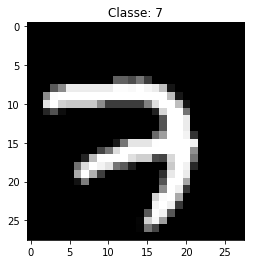

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0].reshape((28,28)), cmap = 'gray')
plt.title('Classe: ' + str(y_train[0]))

In [11]:
import tensorflow as tf

In [12]:
def cria_rede(features, labels, mode):
    #batch_size, largura. altura, canais
    entrada = tf.reshape(features['X'], [-1, 28, 28, 1])
    
    convolucao1 = tf.layers.conv2d(inputs = entrada, filters = 32, kernel_size = [5,5], activation = tf.nn.relu, 
                                   padding = 'same')
    pool1 = tf.layers.max_pooling2d(inputs = convolucao1, pool_size = [2,2], strides = 2)
    
    convolucao2 = tf.layers.conv2d(inputs = pool1, filters = 64, kernel_size = [5,5], activation = tf.nn.relu,
                                  padding = 'same')
    pool2 = tf.layers.max_pooling2d(inputs = convolucao2, pool_size = [2,2], strides = 2)
    
    flattening = tf.reshape(pool2, [-1, 7 * 7 * 64])
    
    dense1 = tf.layers.dense(inputs = flattening, units = 1024, activation = tf.nn.relu)
    
    dropout = tf.layers.dropout(inputs = dense1, rate = 0.2, training = mode == tf.estimator.ModeKeys.TRAIN)
    
    saida = tf.layers.dense(inputs = dropout, units = 10)
    
    previsoes = tf.argmax(saida, axis = 1)
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode, predictions = previsoes)
    
    erro = tf.losses.sparse_softmax_cross_entropy(labels = labels, logits = saida)
    
    if mode == tf.estimator.ModeKeys.TRAIN:    
        otimizador = tf.train.AdamOptimizer(learning_rate = 0.001)
        treinamento = otimizador.minimize(erro, global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode = mode, loss = erro, train_op = treinamento)
    
    if mode == tf.estimator.ModeKeys.EVAL:
        eval_metrics_ops = {'accuracy': tf.metrics.accuracy(labels = labels, predictions = previsoes)}
        return tf.estimator.EstimatorSpec(mode = mode, loss = erro, eval_metric_ops = eval_metrics_ops)
    
    

In [13]:
classificador = tf.estimator.Estimator(model_fn = cria_rede)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpfg_qu6_p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f136df55320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
funcao_train = tf.estimator.inputs.numpy_input_fn(x = {'X': X_train}, y = y_train,
                                                 batch_size = 128, num_epochs = None, shuffle = True)

classificador.train(input_fn=funcao_train, steps = 200)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpfg_qu6_p/model.ckpt.
INFO:tensorflow:loss = 2.3082843, step = 1
INFO:tensorflow:global_step/sec: 6.57362
INFO:tensorflow:loss = 0.07555992, step = 101 (15.213 sec)
INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmpfg_qu6_p/model.ckpt.
INFO:tensorflow:Loss for final step: 0.061026804.


In [19]:
funcao_teste = tf.estimator.inputs.numpy_input_fn(x = {'X': X_test}, y = y_test, num_epochs = 1,
                                                 shuffle = False)

resultados = classificador.evaluate(input_fn = funcao_teste)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-13-16:51:42
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfg_qu6_p/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-13-16:51:45
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.9641, global_step = 200, loss = 0.107183665
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmpfg_qu6_p/model.ckpt-200


In [20]:
resultados

{'accuracy': 0.9641, 'global_step': 200, 'loss': 0.107183665}

In [21]:
X_imagem_teste = X_test[0]
X_imagem_teste.shape

(784,)

In [22]:
X_imagem_teste = X_imagem_teste.reshape(1,-1)
X_imagem_teste.shape

(1, 784)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfg_qu6_p/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
7


<function matplotlib.pyplot.title>

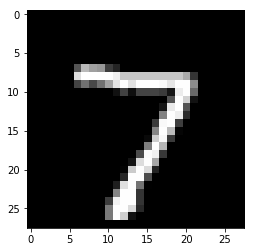

In [25]:
funcao_previsao = tf.estimator.inputs.numpy_input_fn(x = {'X': X_imagem_teste}, shuffle=False)
pred = list(classificador.predict(input_fn=funcao_previsao))

print(pred[0])


plt.imshow(X_imagem_teste.reshape((28,28)), cmap = 'gray')
plt.title

In [75]:
pred[0]

7

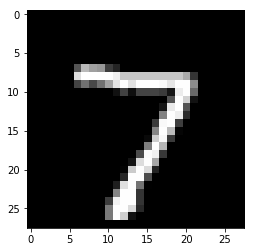

In [76]:
plt.imshow(X_imagem_teste.reshape((28,28)), cmap = 'gray')
plt.title

TypeError: export_saved_model() missing 1 required positional argument: 'serving_input_receiver_fn'